In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
microbes = pd.read_csv('./data/rel_microbes.from_biom.tsv', sep='\t', index_col=0)
metabolites = pd.read_csv('./data/rel_metabolites.from_biom.tsv', sep='\t', index_col=0)

In [4]:
microbes.head()

,sample_341,sample_1499,sample_335,sample_2132,sample_2474,sample_1086,sample_1915,sample_159,sample_653,sample_1437,...,sample_313,sample_1964,sample_1609,sample_1637,sample_1960,sample_187,sample_2021,sample_1440,sample_2100,sample_2020
#OTU ID,,,,,,,,,,,,,,,,,,,,,
theta_p_0,60.0,481.0,182.0,571.0,87.0,134.0,178.0,275.0,53.0,59.0,...,56.0,138.0,551.0,167.0,390.0,222.0,369.0,101.0,67.0,142.0
theta_p_1,197.0,104.0,27.0,45.0,42.0,62.0,104.0,26.0,62.0,137.0,...,25.0,177.0,118.0,398.0,43.0,103.0,30.0,176.0,31.0,160.0
theta_p_2,15.0,39.0,135.0,59.0,219.0,57.0,8.0,53.0,48.0,375.0,...,5.0,306.0,104.0,377.0,32.0,266.0,39.0,20.0,89.0,28.0
theta_p_3,9.0,88.0,122.0,114.0,19.0,32.0,68.0,17.0,37.0,34.0,...,34.0,13.0,59.0,57.0,35.0,13.0,19.0,35.0,28.0,58.0
theta_p_4,79.0,326.0,44.0,322.0,22.0,414.0,27.0,36.0,20.0,18.0,...,58.0,135.0,75.0,421.0,10.0,35.0,268.0,212.0,18.0,86.0


In [5]:
metabolites.head()

,sample_126,sample_127,sample_128,sample_129,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,...,sample_2510,sample_2511,sample_2512,sample_2513,sample_2514,sample_2515,sample_2516,sample_2517,sample_2518,sample_2519
#OTU ID,,,,,,,,,,,,,,,,,,,,,
P_0,9.984261e+06,1.673015e+07,1.553211e+07,9.526305e+06,2.075625e+07,1.377428e+07,1.026732e+07,1.126683e+07,1.189009e+07,7.784335e+06,...,3.360860e+07,1.336116e+07,1.084934e+07,1.476828e+07,9.587357e+06,1.774556e+07,5.196061e+06,1.598415e+07,8.268541e+06,2.157853e+07
P_1,5.627557e+06,3.584205e+06,3.315890e+06,4.590533e+06,3.448489e+06,4.161782e+06,4.977201e+06,3.276491e+06,5.170719e+06,1.448178e+06,...,2.291204e+06,2.847198e+06,2.791451e+06,2.433706e+06,4.660650e+06,3.743524e+06,2.482116e+06,3.554089e+06,2.701369e+06,2.942046e+06
P_2,4.516346e+06,8.961674e+06,7.086252e+06,5.586603e+06,9.011874e+06,9.370849e+06,6.487410e+06,6.856086e+06,7.917220e+06,4.924549e+06,...,1.199863e+07,1.113481e+07,7.227623e+06,9.116475e+06,5.972348e+06,8.834061e+06,4.371040e+06,9.106983e+06,5.390304e+06,9.374330e+06
P_3,3.146196e+06,3.200767e+06,2.991411e+06,3.524390e+06,3.665124e+06,2.961840e+06,3.487971e+06,3.105467e+06,5.031372e+06,1.817242e+06,...,2.964300e+06,2.111506e+06,2.636465e+06,2.284357e+06,2.932795e+06,3.103802e+06,2.291112e+06,4.326523e+06,2.724141e+06,3.132087e+06
P_4,2.099035e+06,2.484916e+06,1.603054e+06,1.772061e+06,2.052590e+06,2.418923e+06,2.545530e+06,1.880178e+06,2.926636e+06,8.917568e+05,...,1.268405e+06,1.702627e+06,1.475635e+06,1.756423e+06,2.479370e+06,2.445041e+06,1.372812e+06,2.093592e+06,1.699032e+06,1.629243e+06


#OTU ID
theta_p_0     0
theta_p_1     0
theta_p_2     0
theta_p_3     0
theta_p_4     0
theta_p_5     1
theta_p_6     3
theta_p_7     1
theta_p_8     5
theta_p_9    45
dtype: int64


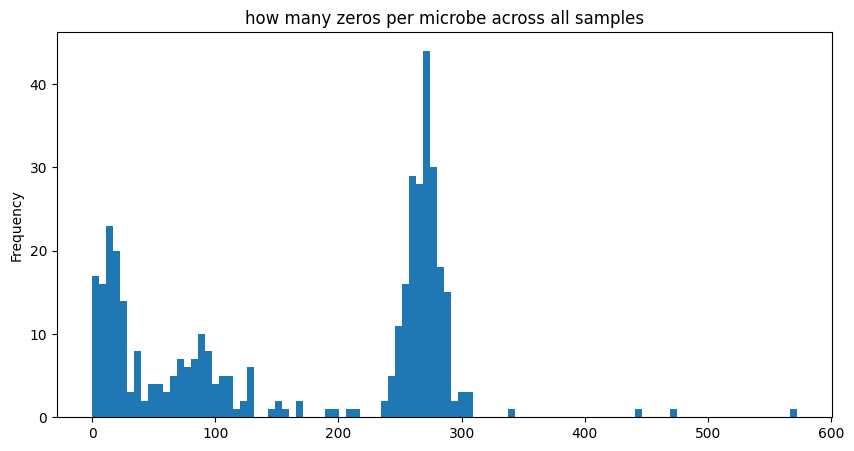

In [16]:
# count how many zeros per microbe
zero_count = (microbes == 0).sum(axis=1)
print(zero_count.head(10))
fig = zero_count.plot(kind='hist', bins=100, figsize=(10, 5))
fig.title.set_text('how many zeros per microbe across all samples')

sample_341      62
sample_1499     29
sample_335      64
sample_2132    111
sample_2474     33
sample_1086     42
sample_1915     47
sample_159      50
sample_653      39
sample_1437     37
dtype: int64


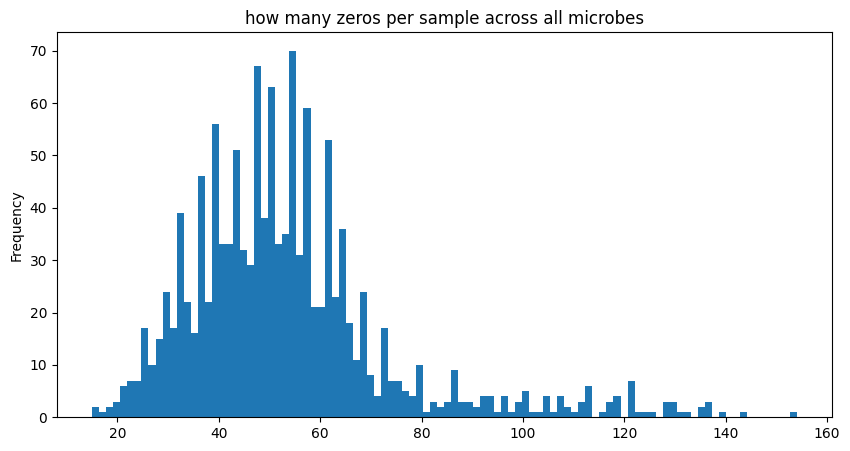

In [17]:
# count how many zeros per sample
zero_count = (microbes == 0).sum(axis=0)
print(zero_count.head(10))
fig = zero_count.plot(kind='hist', bins=100, figsize=(10, 5))
fig.title.set_text('how many zeros per sample across all microbes')

In [38]:
coefficients = pd.read_csv('./results/rel_normalized/coefficient_matrix_parallel.tsv', sep='\t', index_col=0)
abs_coefficients = pd.read_csv('./results/abs/coefficient_matrix_parallel.tsv', sep='\t', index_col=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f446ddd6d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f446db39a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f446ddf5510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f446db3ab10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f446db3b350>],
 'means': []}

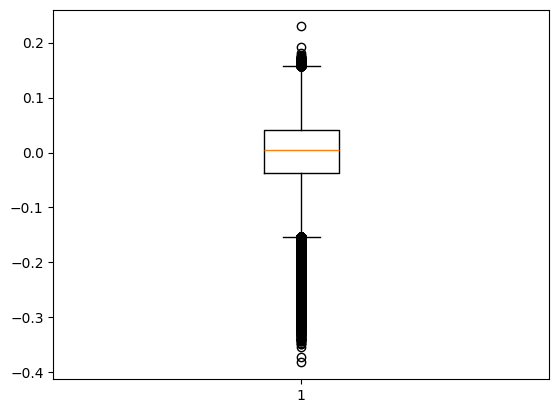

In [5]:
plt.boxplot(coefficients.values.ravel())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f445bd27d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f445bdef710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f445bd26a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f445bbec8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f445bb661d0>],
 'means': []}

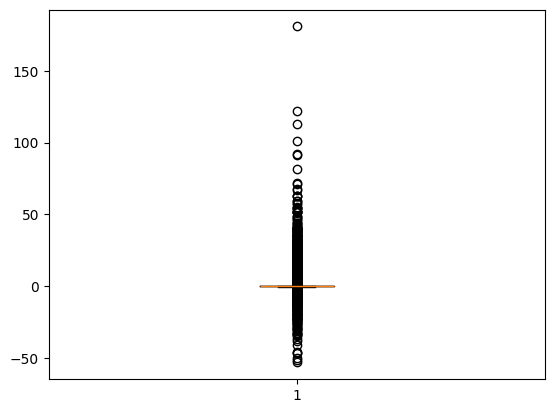

In [39]:
plt.boxplot(abs_coefficients.values.ravel())

(array([3.0000e+00, 5.0000e+01, 1.7900e+02, 5.5400e+02, 2.8600e+03,
        7.9010e+03, 1.2883e+04, 1.5180e+04, 1.1717e+04, 7.2940e+03,
        8.6700e+03, 2.7680e+04, 6.1885e+04, 6.6880e+04, 2.8654e+04,
        1.3258e+04, 1.1808e+04, 2.5040e+03, 3.9000e+01, 1.0000e+00]),
 array([-0.3823434 , -0.3517516 , -0.3211598 , -0.29056801, -0.25997621,
        -0.22938442, -0.19879262, -0.16820083, -0.13760903, -0.10701724,
        -0.07642544, -0.04583365, -0.01524185,  0.01534995,  0.04594174,
         0.07653354,  0.10712533,  0.13771713,  0.16830892,  0.19890072,
         0.22949251]),
 <BarContainer object of 20 artists>)

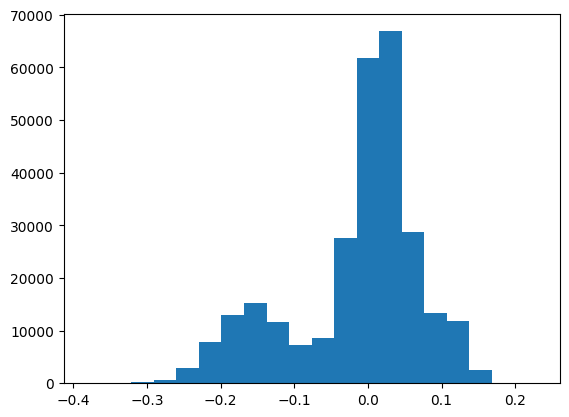

In [6]:
plt.hist(coefficients.values.ravel(), bins=20)

(array([6.7611e+04, 6.7421e+04, 5.4552e+04, 4.2319e+04, 8.1134e+04,
        4.6027e+04, 4.9605e+04, 2.9845e+04, 2.5348e+04, 1.6497e+04,
        1.0576e+04, 6.3730e+03, 3.4600e+03, 1.7790e+03, 8.6900e+02,
        3.6900e+02, 1.4600e+02, 5.3000e+01, 1.2000e+01, 4.0000e+00]),
 array([0.        , 0.39701139, 0.79402278, 1.19103416, 1.58804555,
        1.98505694, 2.38206833, 2.77907972, 3.17609111, 3.57310249,
        3.97011388, 4.36712527, 4.76413666, 5.16114805, 5.55815944,
        5.95517082, 6.35218221, 6.7491936 , 7.14620499, 7.54321638,
        7.94022777]),
 <BarContainer object of 20 artists>)

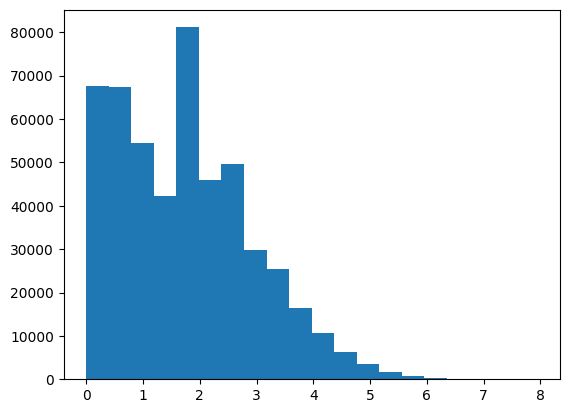

In [23]:
# plt.hist(microbes.values.ravel(), bins=20)
plt.hist(np.log(microbes.values + 1).ravel(), bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f446394fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4463960cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f446394f1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4463961d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4463962590>],
 'means': []}

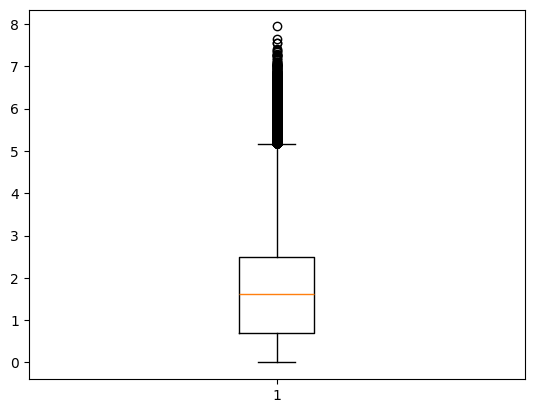

In [24]:
plt.boxplot(np.log(microbes.values + 1).ravel())

(array([289.,  51.,  39.,   7.,   3.,   3.,   1.,   4.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1862. ,  16230.6,  30599.2,  44967.8,  59336.4,  73705. ,
         88073.6, 102442.2, 116810.8, 131179.4, 145548. , 159916.6,
        174285.2, 188653.8, 203022.4, 217391. , 231759.6, 246128.2,
        260496.8, 274865.4, 289234. ]),
 <BarContainer object of 20 artists>)

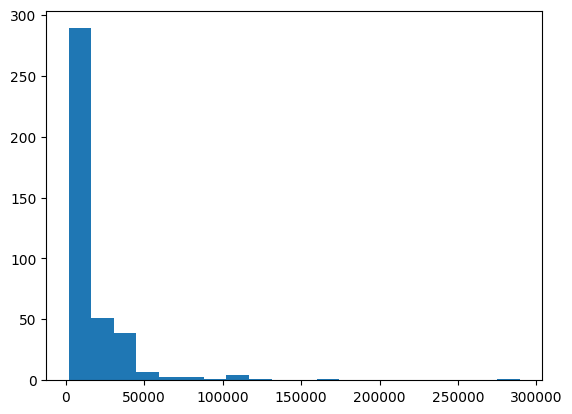

In [18]:
plt.hist(microbes.values.sum(axis=1), bins=20)
# sum of all values of a microbe are heavily skewed

(array([  3.,   2., 206.,   4.,  14.,  29.,  30.,  18.,  22.,  34.,  15.,
          8.,   2.,   5.,   1.,   4.,   1.,   1.,   0.,   1.]),
 array([ 790.9454848 , 1067.44138235, 1343.93727991, 1620.43317746,
        1896.92907502, 2173.42497257, 2449.92087013, 2726.41676768,
        3002.91266524, 3279.40856279, 3555.90446035, 3832.4003579 ,
        4108.89625546, 4385.39215301, 4661.88805057, 4938.38394812,
        5214.87984568, 5491.37574323, 5767.87164079, 6044.36753834,
        6320.8634359 ]),
 <BarContainer object of 20 artists>)

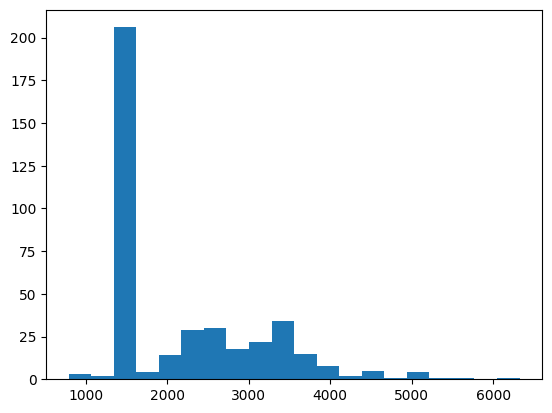

In [19]:
plt.hist(np.log(microbes.values + 1).sum(axis=1), bins=20)
# sum of all values of a microbe after log transformation are still skewed

(array([  5.,  12.,  38.,  45., 106., 140., 150., 173., 166., 147.,  97.,
         77.,  43.,  25.,  19.,  10.,   3.,   2.,   0.,   2.]),
 array([3633.  , 3810.85, 3988.7 , 4166.55, 4344.4 , 4522.25, 4700.1 ,
        4877.95, 5055.8 , 5233.65, 5411.5 , 5589.35, 5767.2 , 5945.05,
        6122.9 , 6300.75, 6478.6 , 6656.45, 6834.3 , 7012.15, 7190.  ]),
 <BarContainer object of 20 artists>)

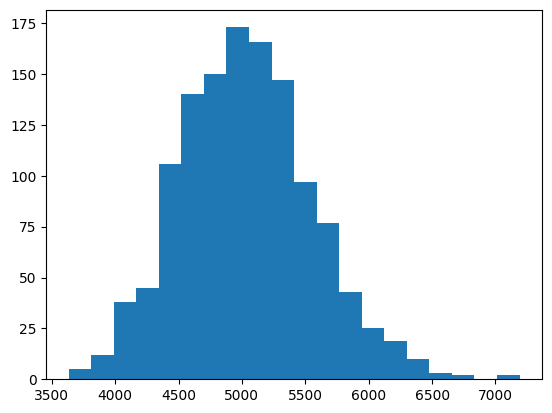

In [15]:
plt.hist(microbes.values.sum(axis=0), bins=20)
# sum of all values of an experiment are normally distributed

In [26]:
abs_microbes = pd.read_csv('./data/abs_microbes.from_biom.tsv', sep='\t', index_col=0)
abs_metabolites = pd.read_csv('./data/rel_metabolites.from_biom.tsv', sep='\t', index_col=0)

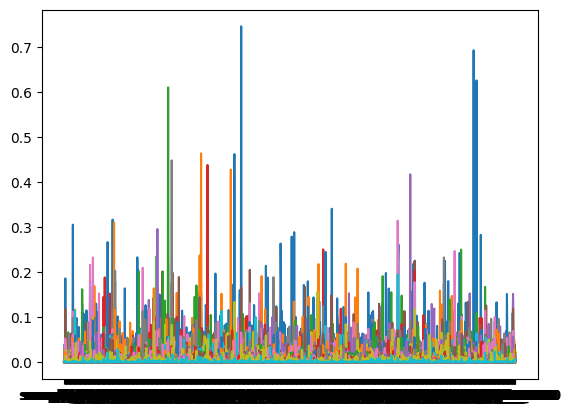

In [36]:
plt.plot(abs_microbes.head(100).T)

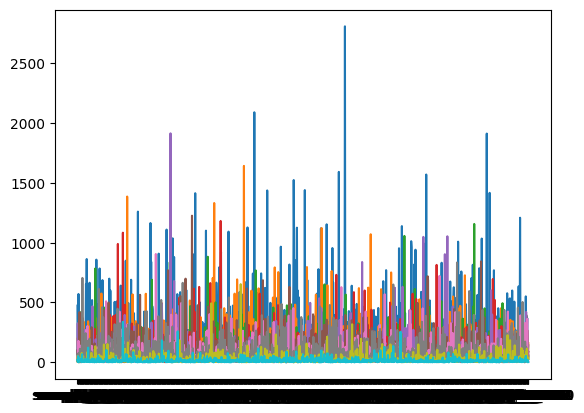

In [37]:
plt.plot(microbes.head(10).T)

In [ ]:
plt.plot()